# Description
This notebook is designed as an extension to the work done in CommonAnalysis.ipynb.
Specifically, per course requirements, the extension Plan will required me to ask a human 
centered data science question that extends the work in Course Project Part 1 - Common Analysis. 

Therefore, the human centered data science question that I ended up asking/answering is:
"What impacts does wildfire smoke have on the healthcare industry in Leavenworth, Kansas?"

The end goal of answering the proposed human centered data science question is to use analysis to craft a policy
recommendation for the city council of Leavenworth.
# -------------------------------------------------------------------------------------------

# Policy recommendation
#### Given the analysis findings, 
##### 1. There is no need for the city to take drastic actions against wildfire smoke yet.
##### 2. I recommend the city should, however, continue to closely monitor the volume of wildfiresmoke received so that they can make better informed decisions in the future.
##### 3. Stay at home recommendations should be issued when the Air Quality Index (AQI) is at unhealthy levels.
##### 4. Try to increase public awareness of the dangers of inhaling wildfire smoke.
##### 5. Consider subsidizing the healthcare industry to combating the declining workforce.

# -------------------------------------------------------------------------------------------
# Why did you make this policy recommendation?
```
There are three main reasons I made this policy recommendation.
1. The Health care industry is going to have their work cut out for them in the future due to an increasing population,
   increasing old age depedency ratio, and decreasing number of healthcare workers.
2. The amount of wildfire smoke Leavenworth receives is increasing, and it's AQI levels are going up. 
   (See CommonAnalysis.ipynb)
3. Long term exposure to wildfire smoke exacerbates health issues. Thus, the increasing smoke will lead to increased
   Emergency Department (ED) visits, which in turn costs extra money.
```

# Implications of more ED visits:
1. Less healthcare workers to keep up with the increasing number of ED visits will lead to lower standards of care.
2. More money spent + less insurance = potential economic issues.

# -------------------------------------------------------------------------------------------

# Notes: 

## See ../Reports/ExtensionPlanReport.pdf
This file outlines the initial plan I had for extending the work of CommonAnalysis.ipynb. However, as you may notice,
this work ends up slightly deviating from that original plan due to the fact that the specific data and facts I were looking for were not available. Therefore, I ended up going with a more generic approach (Looking at general population trends).

# Imports

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm

# Read in census data
# -------------------------------------------------------------------------------------------
Data description
```
This work utilized United States census data, which can be found at https://data.census.gov/. United States census data is quite vast and can include many different schemas which cannot be fully described here. For this work specifically, population estimates, age estimates, healthcare coverage estimates, and employment by industry estimates were used. 

Data downloaded has three files per year, below are some examples:
1. ACSST5Y2010.20101-Column-Metadata.csv - Describes what each column in the Data file stands for
2. ACSST5Y2010.20101-Data.csv            - The quantitative data we use in our analyses
3. ACSST5Y2010.20101-Table-Notes.txt     - Extra metadata describing how certain fields were calculated, 
                                           how estimates were made, etc.
```
# -------------------------------------------------------------------------------------------
How data is to be read in
```
In the case of this work, we read in csv files through Pandas, where the header row is automatically inferred. 
Specifically, for each census file its associated Column-Metadata.csv file was looked at to determine which data
we wanted to work with in this notebook. From there, we would load all of the information we wanted to keep into a dictionary, where the key was the year and the value was a dictionary of everything we wanted to keep. One major issue that 
came up was that metadata formats changed at times. However, these relevant changes are documented in the markdown cell above each set of files worked with. 
```

#### Age demographics per year from 2010-2021
Codes:  
S0101_C01_001E - Total population estimate  
S0101_C01_002E - Age under 5 estimate  
S0101_C01_003E - Age 5 to 9 estimate  
S0101_C01_004E - Age 10 to 14 estimate  
S0101_C01_005E - Age 15 to 19 estimate  
S0101_C01_006E - 20 to 24  
S0101_C01_007E - 25 to 29  
S0101_C01_008E - 30 to 34  
S0101_C01_009E - 35 to 39  
S0101_C01_010E - 40 to 44  
S0101_C01_011E - 45 to 49  
S0101_C01_012E - 50 to 54  
S0101_C01_013E - 55 to 59  
S0101_C01_014E - 60 to 64  
S0101_C01_015E - 65 to 69  
S0101_C01_016E - 70 to 74  
S0101_C01_017E - 75 to 79  
S0101_C01_018E - 80 to 84  
S0101_C01_019E - 85+  
S0101_C01_032E - Age depedency ratio

2010 Old age dpe S0101_C01_033E
 2021 old age dpe S0101_C01_035E
   
    if(year < 2017):
        results["Age_dependency_ratio"] = float(testdf['S0101_C01_032E'][1])
        results["Old_Age_dependency_ratio"] = float(testdf['S0101_C01_033E'][1])
    if(year >= 2017):
        results["Age_dependency_ratio"] = float(testdf['S0101_C01_034E'][1])
        results["Old_Age_dependency_ratio"] = float(testdf['S0101_C01_035E'][1])
    return results


In [2]:
def getColumnValueFromFile(filepath, column):
    """
    Description:
        Reads in census data files and parses out a particular field
    Inputs:
        filepath - String - Location of file
    Outputs:
        Value at column... Could be a string/float/int/etc
    """
    testdf = pd.read_csv(filepath)
    return testdf[column][1]

# Get total population estimates
population_sizes = {
    2010 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2010.S0101-Data.csv", 'S0101_C01_001E'),
    2011 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2011.S0101-Data.csv", 'S0101_C01_001E'),
    2012 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2012.S0101-Data.csv", 'S0101_C01_001E'),
    2013 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2013.S0101-Data.csv", 'S0101_C01_001E'),
    2014 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2014.S0101-Data.csv", 'S0101_C01_001E'),
    2015 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2015.S0101-Data.csv", 'S0101_C01_001E'),
    2016 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2016.S0101-Data.csv", 'S0101_C01_001E'),
    2017 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2017.S0101-Data.csv", 'S0101_C01_001E'),
    2018 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2018.S0101-Data.csv", 'S0101_C01_001E'),
    2019 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2019.S0101-Data.csv", 'S0101_C01_001E'),
    2020 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2020.S0101-Data.csv", 'S0101_C01_001E'),
    2021 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2021.S0101-Data.csv", 'S0101_C01_001E')
}
print(population_sizes)

# Get old age depedency ratio estimates
old_age_dependency_ratios = {
    2010 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2010.S0101-Data.csv", 'S0101_C01_033E'),
    2011 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2011.S0101-Data.csv", 'S0101_C01_033E'),
    2012 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2012.S0101-Data.csv", 'S0101_C01_033E'),
    2013 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2013.S0101-Data.csv", 'S0101_C01_033E'),
    2014 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2014.S0101-Data.csv", 'S0101_C01_033E'),
    2015 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2015.S0101-Data.csv", 'S0101_C01_033E'),
    2016 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2016.S0101-Data.csv", 'S0101_C01_033E'),
    2017 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2017.S0101-Data.csv", 'S0101_C01_035E'), #Change in metadata
    2018 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2018.S0101-Data.csv", 'S0101_C01_035E'),
    2019 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2019.S0101-Data.csv", 'S0101_C01_035E'),
    2020 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2020.S0101-Data.csv", 'S0101_C01_035E'),
    2021 : getColumnValueFromFile("../Data/AgeAndSex/ACSST5Y2021.S0101-Data.csv", 'S0101_C01_035E')
}

{2010: '35174', 2011: '35300', 2012: '35434', 2013: '35586', 2014: '35738', 2015: '35861', 2016: '35948', 2017: '35958', 2018: '36008', 2019: '36064', 2020: '36129', 2021: '37216'}


#### Industry by employed civilian over 16
Codes: 
S2407_C01_001E - Total estimate civilian employed population 16+  
S2407_C01_011E - Total estimate Educational/Healthcare/social workers

In [3]:
# Get total number of employees
total_employed_estimates = {
    2010 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2010.S2407-Data.csv", "S2407_C01_001E"),
    2011 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2011.S2407-Data.csv", "S2407_C01_001E"),
    2012 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2012.S2407-Data.csv", "S2407_C01_001E"),
    2013 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2013.S2407-Data.csv", "S2407_C01_001E"),
    2014 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2014.S2407-Data.csv", "S2407_C01_001E"),
    2015 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2015.S2407-Data.csv", "S2407_C01_001E"),
    2016 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2016.S2407-Data.csv", "S2407_C01_001E"),
    2017 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2017.S2407-Data.csv", "S2407_C01_001E"),
    2018 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2018.S2407-Data.csv", "S2407_C01_001E"),
    2019 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2019.S2407-Data.csv", "S2407_C01_001E"),
    2020 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2020.S2407-Data.csv", "S2407_C01_001E"),
    2021 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2021.S2407-Data.csv", "S2407_C01_001E")
}

# Get healthcare/education/social worker counts
total_hes_workers_estimates = {
    2010 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2010.S2407-Data.csv", "S2407_C01_011E"),
    2011 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2011.S2407-Data.csv", "S2407_C01_011E"),
    2012 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2012.S2407-Data.csv", "S2407_C01_011E"),
    2013 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2013.S2407-Data.csv", "S2407_C01_011E"),
    2014 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2014.S2407-Data.csv", "S2407_C01_011E"),
    2015 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2015.S2407-Data.csv", "S2407_C01_011E"),
    2016 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2016.S2407-Data.csv", "S2407_C01_011E"),
    2017 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2017.S2407-Data.csv", "S2407_C01_011E"),
    2018 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2018.S2407-Data.csv", "S2407_C01_011E"),
    2019 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2019.S2407-Data.csv", "S2407_C01_011E"),
    2020 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2020.S2407-Data.csv", "S2407_C01_011E"),
    2021 :  getColumnValueFromFile("../Data/IndustryByClassCivilianEmployedOver16/ACSST5Y2021.S2407-Data.csv", "S2407_C01_011E")
}

In [4]:
percent_population_uninsured = {
    "2012" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2012.S2701-Data.csv", 'S2701_C03_001E'),
    "2013" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2013.S2701-Data.csv", 'S2701_C03_001E'),
    "2014" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2014.S2701-Data.csv", 'S2701_C03_001E'),
    "2015" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2015.S2701-Data.csv", 'S2701_C05_001E'), #Change in metadata
    "2016" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2016.S2701-Data.csv", 'S2701_C05_001E'),
    "2017" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2017.S2701-Data.csv", 'S2701_C05_001E'),
    "2018" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2018.S2701-Data.csv", 'S2701_C05_001E'),
    "2019" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2019.S2701-Data.csv", 'S2701_C05_001E'),
    "2020" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2020.S2701-Data.csv", 'S2701_C05_001E'),
    "2021" :  getColumnValueFromFile("../Data/HealthInsuranceCoverage/ACSST5Y2021.S2701-Data.csv", 'S2701_C05_001E')
}

# Basic visualizations
In the cells below we are simply showing time-series graphs of various census data for Leavenworth Kansas.

# -------------------------------------------------------------------------------------------
Population over time 
```
Relevant to policy recommendation reason #1: 
    The Health care industry is going to have their work cut out for them in the future due to an increasing population,
    increasing old age depedency ratio, and decreasing number of healthcare workers.
```
# -------------------------------------------------------------------------------------------
Health care employment percentage to overall population
```
Relevant to policy recommendation reason #1: 
    The Health care industry is going to have their work cut out for them in the future due to an increasing population,
    increasing old age depedency ratio, and decreasing number of healthcare workers.
```
# -------------------------------------------------------------------------------------------
Age dependency ratio
```
Relevant to policy recommendation reason #1: 
    The Health care industry is going to have their work cut out for them in the future due to an increasing population,
    increasing old age depedency ratio, and decreasing number of healthcare workers.
```
# -------------------------------------------------------------------------------------------
Health insurance rates
```
Relevant to policy recommendation reason #3: 
    Long term exposure to wildfire smoke exacerbates health issues. Thus, the increasing smoke will lead to increased
    Emergency Department (ED) visits, which in turn costs extra money.
```
# -------------------------------------------------------------------------------------------

#### Population over time
Simple plot where year is on the x-axis and estimated population is on the y-axis.

Text(0, 0.5, 'Population count')

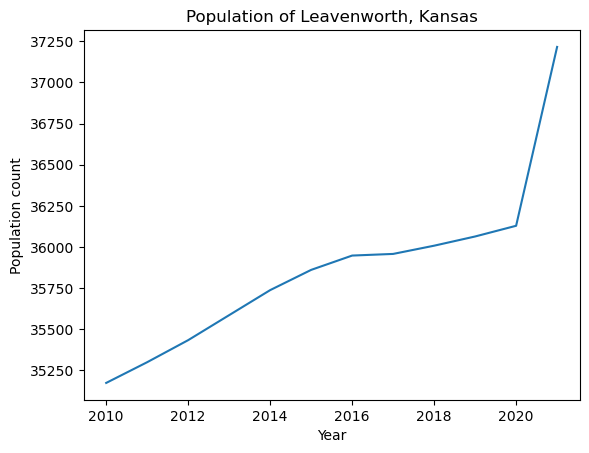

In [5]:
# Get data into format that is digestible by matplotlib
population_estimates = []
years = []
for year in population_sizes.keys():
    years.append(year)
    population_estimates.append(float(population_sizes[year]))

# Create plot
plt.plot(years, population_estimates)
plt.title("Population of Leavenworth, Kansas")
plt.xlabel("Year")
plt.ylabel("Population count")

#### Health care employment percentage to overal population
Simple plot where year is on the x-axis and estimated percentage of civilian population who works in healthcare/education/socialwork is on the y-axis.

Text(0, 0.5, 'Population percentage')

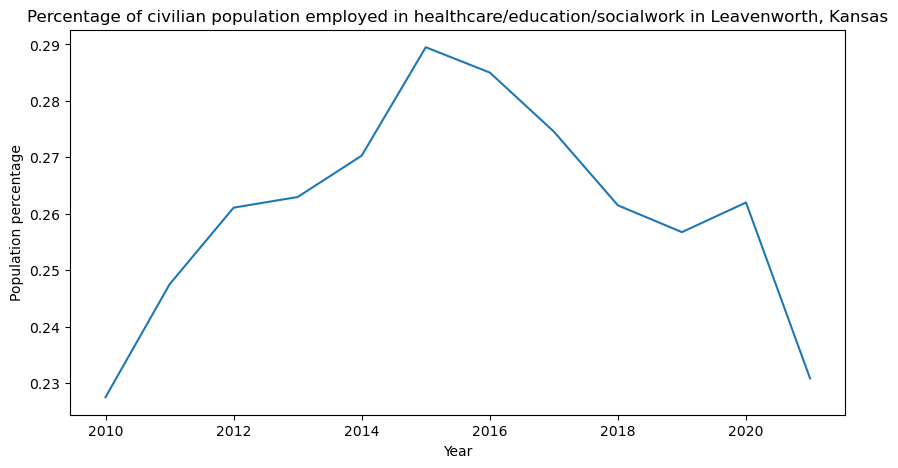

In [6]:
# Get data into format that is digestible by matplotlib
healthcare_employment_percentages = []
years = []
for year in total_employed_estimates.keys():
    years.append(year)
    healthcare_employment_percentages.append(float(total_hes_workers_estimates[year]) / float(total_employed_estimates[year]))

# Create plot
plt.figure(figsize=(10,5))
plt.plot(years, healthcare_employment_percentages)
plt.title("Percentage of civilian population employed in healthcare/education/socialwork in Leavenworth, Kansas")
plt.xlabel("Year")
plt.ylabel("Population percentage")

#### Old age dependency ratio
Simple plot where year is on the x-axis and estimated old age dependency ratio is on the y-axis.

Text(0, 0.5, 'Old age dependency ratio')

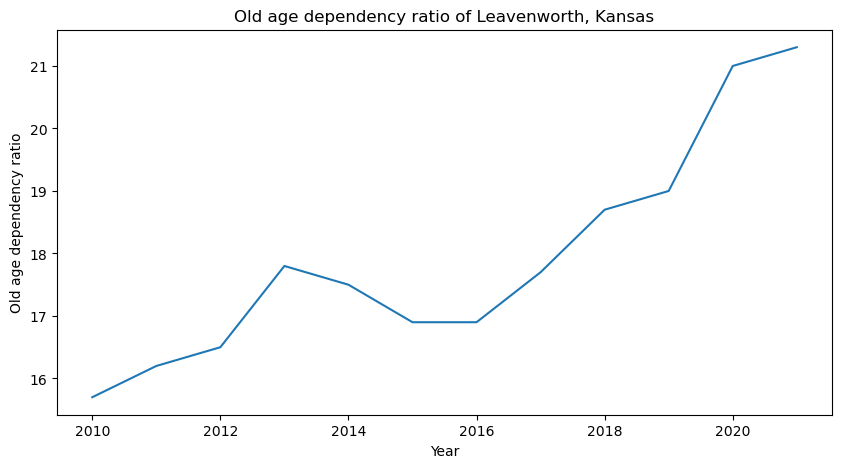

In [7]:
# Get information into format that is digestible by matplotlib
ADRs = []
years = []
for year in old_age_dependency_ratios.keys():
    years.append(year)
    ADRs.append(float(old_age_dependency_ratios[year]))

# Create plot
plt.figure(figsize=(10,5))
plt.plot(years, ADRs)
plt.title("Old age dependency ratio of Leavenworth, Kansas")
plt.xlabel("Year")
plt.ylabel("Old age dependency ratio")

#### Health insurance
Simple plot where year is on the x-axis and estimated percent of population without health insurance is on the y-axis.

Text(0, 0.5, 'Uninsured %')

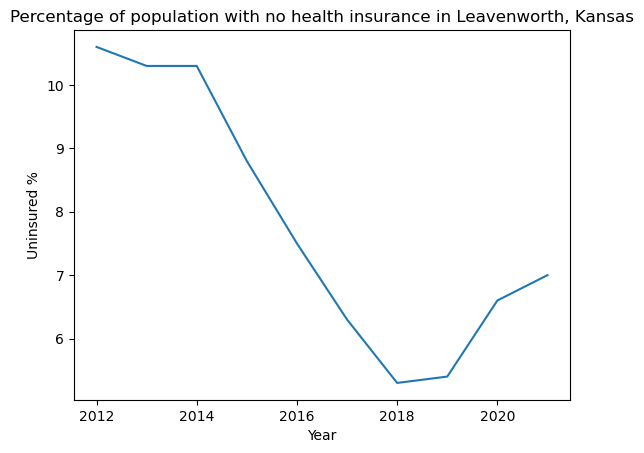

In [8]:
# Get information into format that is digestible by matplotlib
PercentUninsured = []
years = []
for year in percent_population_uninsured.keys():
    years.append(int(year))
    PercentUninsured.append(float(percent_population_uninsured[year]))

# Create plot
plt.plot(years, PercentUninsured)
plt.title("Percentage of population with no health insurance in Leavenworth, Kansas")
plt.xlabel("Year")
plt.ylabel("Uninsured %")

# -------------------------------------------------------------------------------------------
# Project leavenworth population to 2050 via line equation
```
In this cell, we are making a simple projection of the population of Leavenworth, Kansas.  
The way we are doing this is simply by creating a line equation given the data.
The form of such an equation is: 
    y = mx + b, where m is the slope and b the intercept.   
Thus, 
    Population = ((36129-35174)/12)x + 37216,
    Where:
        X = number of years after 2010    
        35174 = 2010 population
        36129 = 2020 population
        37216 = 2021 population
        11 = Number of full years passed between 2020 and 2010

    Note:
        We are ignoring 2021 population when considering the line equation in case since 
        it looks a bit anomalous in terms of relative change to previous years. 
```
##### Why use a line equation?
```
I decided to use a line equation here because it is simple. Additionally, without doing extra research there's no
point in throwing a complex prediction model at the problem, as we don't have extra data about Leavenworth
trends that could give us solid predictors of population growth. 

```

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]


Text(0, 0.5, 'Population count')

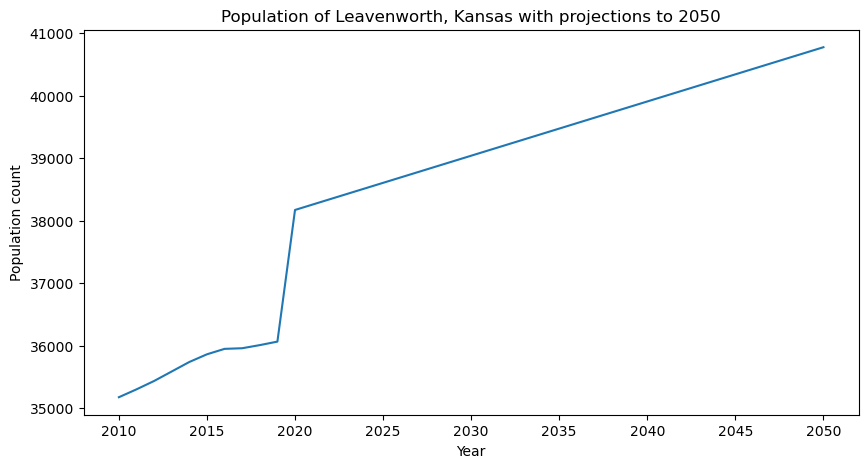

In [9]:
# Store the years 2012 - 2050
years_with_projections = []
for i in range(2010, 2051):
    years_with_projections.append(i)
print(years_with_projections)
    
# Get copy of current population estimates (2012-2022)
population_estimates_with_projections = []
for i in range(len(years)):
    population_estimates_with_projections.append(population_estimates[i])

# Get projected data by applying line equation, and project from 2023-2050
for i in range(11, 42):
    projected_pop = (((36129-35174)/11) * i) + 37216
    population_estimates_with_projections.append(projected_pop)

# Create plot
plt.figure(figsize=(10,5))
plt.plot(years_with_projections, population_estimates_with_projections)
plt.title("Population of Leavenworth, Kansas with projections to 2050")
plt.xlabel("Year")
plt.ylabel("Population count")

# -------------------------------------------------------------------------------------------
# Estimate Leavenworth population with relevant smoke-related health conditions based on national averages (Assuming AQI of 0)
# -------------------------------------------------------------------------------------------
This portion of work will be concerned with the third reason the policy recommendation was made:
```
Long term exposure to wildfire smoke exacerbates health issues. Thus, the increasing smoke will lead to increased
Emergency Department (ED) visits, which in turn costs extra money.
```
More specifically, we look at five specific diseases/health condiitons and use research results to estimate how many people in Leavenworth are affected by those particular issues.

# -------------------------------------------------------------------------------------------
#### Below will outline the 5 conditions considered in this analysis, what the research shows, a reference source, why they were chosen, and assumptions made regarding them
1. Asthma:
        Main takeaway from research:
            7.7% of people in the US had asthma in 2021
        Practical application to this work:
            7.7% of of people in Leavenworth have asthma in all years
        Research source:
            https://www.cdc.gov/asthma/most_recent_national_asthma_data.htm
        Why this condition was chosen:
            According to https://www.cdc.gov/air/wildfire-smoke/default.htm, people with asthma are especially at risk
            when it comes to the adverse effects of wildfire smoke exposure. 
        Assumptions made:
            1. The sociodemographic characteristics of Leavenworth perfectly match the demographics used in the research, 
               which is obviously wrong.
            2. There is a baked in 0.18 standard error to the research paper's 7.7%. 
            3. Nobody who has Asthma in Leavenworth has CVD, has COPD, or has experienced a heart attack 
               or stroke within the past year. 
2. Cardiovascular disease (CVD):
        Main takeaway from research:
            In 2020, the global age-adjusted prevelance rate of CVD is 7534.1 per 100000.
        Practical application to this work:
            Every 7534.1 per 100000 people in Leavenworth, Kansas have CVD for all years. 
            In other words, 7.5341% of people in Leavenworth Kansas have COPD for all years. 
        Research source:
            https://professional.heart.org/-/media/PHD-Files-2/Science-News/2/2022-Heart-and-Stroke-Stat-Update/2022-Stat-
            Update-factsheet-GIobal-Burden-of-Disease.pdf 
        Why this condition was chosen:
            According to https://www.cdc.gov/air/wildfire-smoke/default.htm, people with heart disease are
            especially at risk when it comes to the adverse effects of wildfire smoke exposure.
        Assumptions made:
            1. The sociodemographic characteristics of Leavenworth perfectly match the demographics used in the research, 
               which is obviously wrong.
            2. Nobody who has CVD in Leavenworth has Asthma, has COPD, or has experienced a heart attack 
               or stroke within the past year. 
3. Chronic Obstructive Pulmonary Disease (COPD):
        Main takeaway from research:
            In 2018, 6.4% of all Americans reported that they have been diagnosed with COPD
        Practical application to this work:
            6.4 % of people in Leavenworth, Kansas have COPD for all years.
        Research source:
            https://www.cdc.gov/copd/basics-about.html 
        Why this condition was chosen:
            According to https://www.cdc.gov/air/wildfire-smoke/default.htm, people with COPD are especially at risk
            when it comes to the adverse effects of wildfire smoke exposure.
        Assumptions made:
            1. The sociodemographic characteristics of Leavenworth perfectly match the demographics used in the research, 
               which is obviously wrong.
            2. Nobody who has COPD in Leavenworth has Asthma, has CVD, or has experienced a heart attack 
               or stroke within the past year. 
4. Heart attack (myocardial infarction - MI):
        Main takeaway from research:
            805k Americans have a heart attack per year
            The US population on Jan 1, 2023 was 334,233,854
        Practical application to this work:
            We will estimate that 805000/334,233,854 = 0.241% of people in Leavenworth, 
            Kansas experience a heart attack per year.
        Research sources:
            1. https://www.cdc.gov/heartdisease/facts.htm
            2. https://www.census.gov/library/stories/2022/12/happy-new-year-2023.html
        Why this condition was chosen:
            According to https://www.epa.gov/wildfire-smoke-course/health-effects-attributed-wildfire-smoke, 
            heart attacks are a health effect attributed to wildfire smoke exposure. 
        Assumptions made:
            1. The sociodemographic characteristics of Leavenworth perfectly match the demographics used in the research, 
               which is obviously wrong.
            2. Nobody in Leavenworth, who has experienced a heart attack within the last year has COPD, has Asthma, 
               has CVD, or has experienced a stroke within the past year. 
5. Stroke:
        Main takeaway from research:
            795000 Americans experience a stroke per year
        Practical application to this work:
            We will estimate that 795000/334,233,854 = 0.237% of people in Leavenworth experience a heart attack each year.
        Research source:
            1. ps://www.cdc.gov/stroke/facts.htm
            2. https://www.census.gov/library/stories/2022/12/happy-new-year-2023.html
        Why this condition was chosen:
            According to https://www.epa.gov/wildfire-smoke-course/health-effects-attributed-wildfire-smoke, 
            stroke is a health effect attributed to wildfire smoke exposure. 
        Assumptions made:
            1. The sociodemographic characteristics of Leavenworth perfectly match the demographics used in the research, 
               which is obviously wrong.
            2. Nobody in Leavenworth, who has experienced a stroke within the last year has COPD, has Asthma, 
               has CVD, or has experienced a heart attack within the past year. 
            
# -------------------------------------------------------------------------------------------
#### What about other health conditions?
```
I excluded other health conditions because there was no time to research them all. This of course is where this work
can be extended.
```

#### Asthma

In [10]:
# Loop over projected population and multiply it by asthma factor (7%) to get estimated asthma counts
AsthmaInfo = {}
for i in range(len(population_estimates_with_projections)):
    AsthmaInfo[2010+i] = population_estimates_with_projections[i] * 0.077

#### Cardiovascular disease (CVD)

In [11]:
# Loop over projected population and multiply it by CVD factor (7534.1/100000) to get estimated CVD counts
CVDInfo = {}
for i in range(len(population_estimates_with_projections)):
    CVDInfo[2010+i] = (population_estimates_with_projections[i] * 7534.1) / 100000

#### Chronic Obstructive Pulmonary Disease (COPD)

In [12]:
# Loop over projected population and multiply it by COPD factor (6.4%) to get estimated COPD counts
COPDInfo = {}
for i in range(len(population_estimates_with_projections)):
    COPDInfo[2010+i] = population_estimates_with_projections[i] * 0.064

#### Heart attack (myocardial infarction - MI)

In [13]:
# Loop over projected population and multiply it by heart attack factor (0.241%) to get estimated heart attack counts
HeartAttackInfo = {}
for i in range(len(population_estimates_with_projections)):
    HeartAttackInfo[2010+i] = population_estimates_with_projections[i] * 0.00241

#### Stroke

In [14]:
# Loop over projected population and multiply it by stroke factor (0.237%) to get estimated stroke counts
StrokeInfo = {}
for i in range(len(population_estimates_with_projections)):
    StrokeInfo[2010+i] = population_estimates_with_projections[i] * 0.00237

# -------------------------------------------------------------------------------------------
# Get number of estimated ED visits using population counts

At this point, we now have estimates for the number of people per year in Leavenworth, Kansas that have asthma,
CVD, COPD, or have experienced a heart attack or stroke within the past year. 

Now, using other research sources, we will estimate how many emergency department visits occured due to those conditions.
Additionally, these estimates assume that wildfire smoke is not a factor in determining ED rates.

This portion of work will also be concerned with the third reason the policy recommendation was made:
```
Long term exposure to wildfire smoke exacerbates health issues. Thus, the increasing smoke will lead to increased
Emergency Department (ED) visits, which in turn costs extra money.
```

# -------------------------------------------------------------------------------------------
#### Below will outline the 5 conditions considered in this analysis, what the research shows, a reference source, and assumptions made regarding them

Assumptions made:  
The research papers' socioeconomic distribution was perfectly representative of Leavenworth's for all years, which is obviously wrong.   
ED visits can only be caused by one conditions (IE: Cant go to the ED for asthma and stroke at the same time).   

1. Asthma
        Main takeaway from research:
            1.32% of all ED visits were asthma-related according to the 
            National Hospital Ambulatory Medical Care Survey, 2010–2015
        Practical application:
            1.32% of all ED visits in Leavenworth, Kansas were caused by asthma for all years
        Research source:
            https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8862306/
2. CVD
        Main takeaway from research:
            11.4% of adult ED visits from heart disease (CVD) from 2017-2019
        Practical application:
            11.4% of all ED visits in Leavenworth, Kansas were caused by CVD for all years
        Research source:
            https://www.cdc.gov/nchs/data/nhsr/nhsr174.pdf
3. COPD
        Main takeaway from research:
            Of 90,851 respondants from 11 states in the United States in 2012, 12.44% of respondants reported 
            an ED visit or hospitalization and self reported to have COPD. 
        Practical application:
            12.44% of all ED visits in Leavenworth, Kansas were caused by COPD for all years
        Research source:
            https://journal.copdfoundation.org/jcopdf/id/1103/Characteristics-of-COPD-Patients-Using-
            United-States-Emergency-Care-or-Hospitalization
4. Heart attack
        Main takeaway from research:
             0.6% of ED visits are for Heart attack
        Practical application:
            0.6% of ED visits in Leavenworth, Kansas were caused by heart attacks for all years
        Research source:
            https://hcup-us.ahrq.gov/reports/statbriefs/sb47.pdf
5. Stroke
        Main takeaway from research:
             0.6% of ED visits are for Stroke
        Practical application:
            0.6% of ED visits in Leavenworth, Kansas were caused by strokes for all years
        Research source:
            https://hcup-us.ahrq.gov/reports/statbriefs/sb47.pdf
  
##### Additionally, according to https://www.cdc.gov/nchs/products/databriefs/db452.htm/, 40/100 people visit the ED each year.

In [15]:
# Use the research above to get number of ED visits associated with the various health conditions each year
# In this specific case we are also considering our projected population counts. 
ED_visits_no_smoke = {}
for i in range(len(population_estimates_with_projections)):
    
    # Population estimates start at 2010
    year = 2010 + i
    
    # Get projected population for the year
    total_ED_visits = population_estimates_with_projections[i] * 0.4
    
    # Store yearly estimate for each health condition, as well as the total visits
    ED_visits_no_smoke[year] = {
        "total" : total_ED_visits,
        "Asthma": total_ED_visits * 0.013,
        "CVD": total_ED_visits * 0.114,
        "COPD": COPDInfo[year] * 0.1244,
        "Heart_attack": total_ED_visits * 0.061, #Make this not 0.06 so it shows up in visualizations
        "Stroke": total_ED_visits * 0.06,
    }

##### Plot estimated ED visits for all health conditions given no smoke

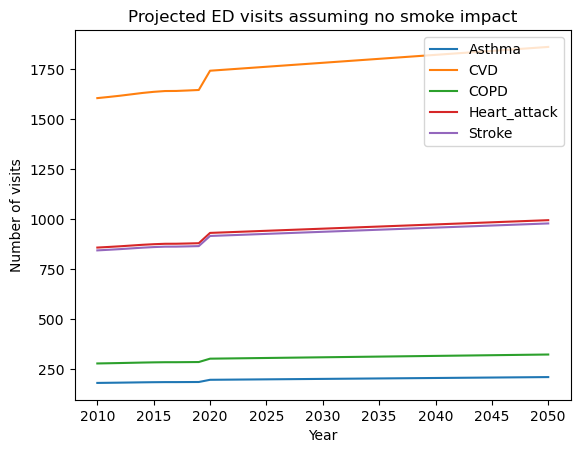

In [16]:
# Get information into format that is digestible by matplotlib
years = []
Asthma = []
CVD = []
COPD = []
Heart_attack = []
Stroke = []
for year in ED_visits_no_smoke.keys():
    years.append(year)
    Asthma.append(ED_visits_no_smoke[year]["Asthma"])
    CVD.append(ED_visits_no_smoke[year]["CVD"])
    COPD.append(ED_visits_no_smoke[year]["COPD"])
    Heart_attack.append(ED_visits_no_smoke[year]["Heart_attack"])
    Stroke.append(ED_visits_no_smoke[year]["Stroke"])

# Create plot
plt.plot(years, Asthma, label="Asthma")
plt.plot(years, CVD, label="CVD")
plt.plot(years, COPD, label="COPD")
plt.plot(years, Heart_attack, label="Heart_attack")
plt.plot(years, Stroke, label="Stroke")
plt.title("Projected ED visits assuming no smoke impact")
plt.xlabel("Year")
plt.ylabel("Number of visits")
plt.legend()

# -------------------------------------------------------------------------------------------
# Get smoke estimates from previous notebook
Now, we want to bring over work done from the CommonAnalysis.ipynb file.  
This portion of work will  be concerned with the second reason the policy recommendation was made:
```
The amount of wildfire smoke Leavenworth receives is increasing, and it's AQI levels are going up. 
   (See CommonAnalysis.ipynb)
```


Yearly smoke formula: Smoke_impact_from_fire = (area_forest_burned * 10 * 87.5) / (distance_from_city^5) To get the annual smoke estimate, we sum the smoke_impact_from_fire over every fire

In [17]:
# Read in data as dictionary of the form:
# {
#    1963: float,
#    1964: float,
#    ...
#    2050: float
# }
with open('../Data/SmokeEstimates.json') as json_file:
    yearly_smoke_estimates = json.load(json_file)
print(yearly_smoke_estimates)

{'1963': 0.0007845067778975681, '1964': 0.0021635518913411113, '1965': 0.016998440407767827, '1966': 0.001709264752936373, '1967': 0.0007258876689639057, '1968': 0.00023524296902009573, '1969': 0.00042468012485909315, '1970': 0.01636269377142011, '1971': 0.004964268863689638, '1972': 0.0645188233004377, '1973': 0.0028017974332351986, '1974': 0.005278419103684302, '1975': 0.003068875009681437, '1976': 0.009844000320371735, '1977': 0.005877137870063218, '1978': 0.0028136060770111815, '1979': 0.004597308611750616, '1980': 0.00903175447855878, '1981': 0.00626256943128422, '1982': 0.002182304839698396, '1983': 0.003428670487791997, '1984': 0.05052999156470137, '1985': 0.023711393443061515, '1986': 0.3995515686962825, '1987': 6.747426608874581, '1988': 62.1655596660853, '1989': 0.6703940050932565, '1990': 0.5803287878283707, '1991': 13.852136642471152, '1992': 0.39384184550046947, '1993': 9.943104784949654, '1994': 20.334484426133606, '1995': 7.444358712848471, '1996': 53.120512342635934, '1

##### Plot projected smoke estimate from previous notebook

Text(0, 0.5, 'Smoke estimate')

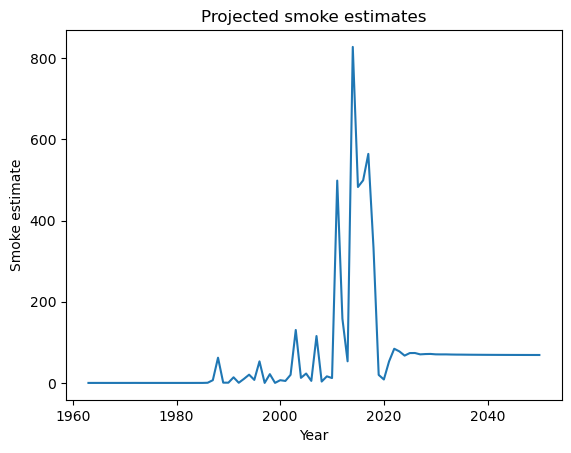

In [18]:
# Get information into format that is digestible by matplotlib
years = []
Estimates = []
for year in yearly_smoke_estimates.keys():
    years.append(int(year))
    Estimates.append(yearly_smoke_estimates[year])

# Create plot
plt.plot(years, Estimates)
plt.title("Projected smoke estimates")
plt.xlabel("Year")
plt.ylabel("Smoke estimate")

# -------------------------------------------------------------------------------------------
# Estimate increase in ED visits from the smoke information
At this point, we have estimates for our population, ED visits per health condition, and our smoke estimate.   
Thus, using research, we will estimate how many increased ED visits there will be for each condition due to wildfire smoke.  
To reiterate, the previously estimated ED visits per health condition did not consider wildfire smoke.  

This part of the analysis is concerned with the third reason for the policy recommendation being made:
```
Long term exposure to wildfire smoke exacerbates health issues. Thus, the increasing smoke will lead to increased
Emergency Department (ED) visits, which in turn costs extra money.
```

This portion of work will be concerned with the third reason the policy recommendation was made:
```
Long term exposure to wildfire smoke exacerbates health issues. Thus, the increasing smoke will lead to increased
Emergency Department (ED) visits, which in turn costs extra money.
```

# -------------------------------------------------------------------------------------------
#### Below will outline the 5 conditions considered in this analysis, what the research shows, a reference source, and assumptions made regarding them

Assumptions.
```
1. The relative scale of the wildfire smoke estimate is unknown. Therefore, we will assume the 'maxmimum' a wildfire smoke estimate can be is 1000. Thus, when considering the increases in ED visits for each condition, when the smoke estimate is 1000 the number of ED visits for a specific condition will be multiplied by the amount reported from the research. When the smoke estimate is 0, the number of ED visits will be multiplied by 1.0. For example, the practical application of the heart attack research says heart attacks will go up by 42% due to wildfire smoke.

2010 ED heart attacks = 1000 | Smoke estimate = 1000 | New ED heart attacks = 1000 * 1.42 = 1420
2011 ED heart attacks = 1000 | Smoke estimate = 500  | New ED heart attacks = 1000 * 1.21 = 1210
2012 ED heart attacks = 1000 | Smoke estiamte = 0    | New ED heart attacks = 1000 * 1.00 = 1000

2. The research papers' socioeconomic distribution was perfectly representative of Leavenworth's for all years, which is obviously wrong.   
```

Condition information
```
1. Asthma
        Main takeaway from research:
            With every rise in PM2.5 by 10 g/m^3, the risk for asthma related ED visits went up by 2.2%
        Practical application:
            If the wildfire smoke estimate was at 1000 for that year, then the number of ED visits due to asthma in 
            Leavenworth, Kansas increased by 2.2% (for all years).
        Research source:
            https://www.healio.com/news/pulmonology/20231107/wildfire-pollution-linked-to-cardiopulmonary-ed-visits
            -among-vulnerable-populations
2. CVD
        Main takeaway from research:
            Given the study background, the relative risk of selected emergency department visits on wildfire-smoke
            days relative to days without smoke across lags = 0 is 0.15 for "medium smoke" days for "All-cause 
            cardiovascular".
        Practical application:
            If the wildfire smoke estimate was at 1000 for that year, then the number of ED visits due to CVD in 
            Leavenworth, Kansas increased by 5% (for all years).
        Research source:
            https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6015400/
3. COPD
        Main takeaway from research:
            With every rise in PM2.5 by 10 g/m^3, the risk for COPD related ED visits went up by 1.39%
        Practical application:
            If the wildfire smoke estimate was at 1000 for that year, then the number of ED visits due to COPD in 
            Leavenworth, Kansas increased by 1.39% (for all years).
        Research source:
            https://www.healio.com/news/pulmonology/20231107/wildfire-pollution-linked-to-cardiopulmonary-ed-visits
            -among-vulnerable-populations
4. Heart attack
        Main takeaway from research:
             ER visits increased 42% for heart attacks and 22% for ischemic heart disease within a 
             day of exposure to dense wildfire smoke according to a specific study. 
        Practical application:
            If the wildfire smoke estimate was at 1000 for that year, then the number of heart attacks in 
            Leavenworth, Kansas increased by 42% (for all years). 
        Research source:
            https://newsroom.heart.org/news/wildfires-may-fuel-heart-health-hazards-smoke-exposure-increases
            -cardiovascular-risks 
5. Stroke
        Main takeaway from research:
            Given the study background, the relative risk of selected emergency department visits on wildfire-smoke
            days relative to days without smoke across lags = 0 is 0.11 for "dense smoke" days for Ischemic stroke.
        Practical application:
            If the wildfire smoke estimate was at 1000 for that year, then the number of strokes in Leavenworth,
            Kansas increased by 11% (for all years). 
        Research source:
            https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6015400/
```

In [19]:
ED_visits_with_smoke = {}

# Get wildfire attributable ED visit increases for each condition
for year in ED_visits_no_smoke.keys():
    
    # Projected smoke estimate
    smoke_estimate = yearly_smoke_estimates[str(year)]
    
    # Calculate via multipliers
    ED_visits_with_smoke[year] = {
        "Asthma": ED_visits_no_smoke[year]["Asthma"] * (1.0 + ((0.022/1000) * smoke_estimate)),
        "CVD": ED_visits_no_smoke[year]["CVD"] * (1.0 + ((0.0105/1000) * smoke_estimate)),
        "COPD": ED_visits_no_smoke[year]["COPD"] * (1.0 + ((0.0139/1000) * smoke_estimate)),
        "Heart_attack": ED_visits_no_smoke[year]["Heart_attack"] * (1.0 + ((0.42/1000) * smoke_estimate)),
        "Stroke": ED_visits_no_smoke[year]["Stroke"] * (1.0 + ((0.11/1000) * smoke_estimate)),
    }
    
    # Store the change in ED visits for each condition
    ED_visits_with_smoke[year]["Diff_asthma"] = ED_visits_with_smoke[year]["Asthma"] - ED_visits_no_smoke[year]["Asthma"]
    ED_visits_with_smoke[year]["Diff_CVD"] = ED_visits_with_smoke[year]["CVD"] - ED_visits_no_smoke[year]["CVD"]
    ED_visits_with_smoke[year]["Diff_COPD"] = ED_visits_with_smoke[year]["COPD"] - ED_visits_no_smoke[year]["COPD"]
    ED_visits_with_smoke[year]["Diff_Heart_attack"] = ED_visits_with_smoke[year]["Heart_attack"] - ED_visits_no_smoke[year]["Heart_attack"]
    ED_visits_with_smoke[year]["Diff_Stroke"] = ED_visits_with_smoke[year]["Stroke"] - ED_visits_no_smoke[year]["Stroke"]
    ED_visits_with_smoke[year]["Diff_total"] = ED_visits_with_smoke[year]["Diff_asthma"] + ED_visits_with_smoke[year]["Diff_CVD"] + ED_visits_with_smoke[year]["Diff_COPD"] + ED_visits_with_smoke[year]["Diff_Heart_attack"] + ED_visits_with_smoke[year]["Diff_Stroke"]

# Show an example of our new projected ED visits due to smoke
print(ED_visits_with_smoke[2010])

{'Asthma': 182.95310458370085, 'CVD': 1604.1365698835316, 'COPD': 280.08804643018306, 'Heart_attack': 862.5727448755815, 'Stroke': 845.2907211623278, 'Diff_asthma': 0.048304583700854664, 'Diff_CVD': 0.20216988353149645, 'Diff_COPD': 0.046728030183089686, 'Diff_Heart_attack': 4.327144875581553, 'Diff_Stroke': 1.1147211623277826, 'Diff_total': 5.739068535324776}


# -------------------------------------------------------------------------------------------
# Show effect smoke has on ED visits - Before and after

Using our projected population and smoke estimates, we can finally plot the number of projected ED visits with and without smoke. 

This portion of work will be concerned with the third reason the policy recommendation was made:
```
Long term exposure to wildfire smoke exacerbates health issues. Thus, the increasing smoke will lead to increased
Emergency Department (ED) visits, which in turn costs extra money.
```

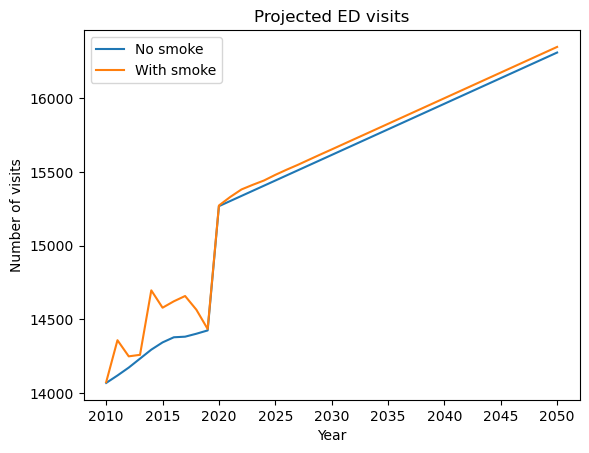

In [20]:
# Get information into format that is digestible by matplotlib
years = []
Totals_no_smoke = []
Totals_with_smoke = []
for year in ED_visits_no_smoke.keys():
    years.append(year)
    Totals_no_smoke.append(ED_visits_no_smoke[year]["total"])
    Totals_with_smoke.append(ED_visits_no_smoke[year]["total"] + ED_visits_with_smoke[year]["Diff_total"])
    
# Create plot
plt.plot(years, Totals_no_smoke, label="No smoke")
plt.plot(years, Totals_with_smoke, label="With smoke")
plt.title("Projected ED visits")
plt.xlabel("Year")
plt.ylabel("Number of visits")
plt.legend()

#### Plot showing how many extra ED visits occur due to smoke

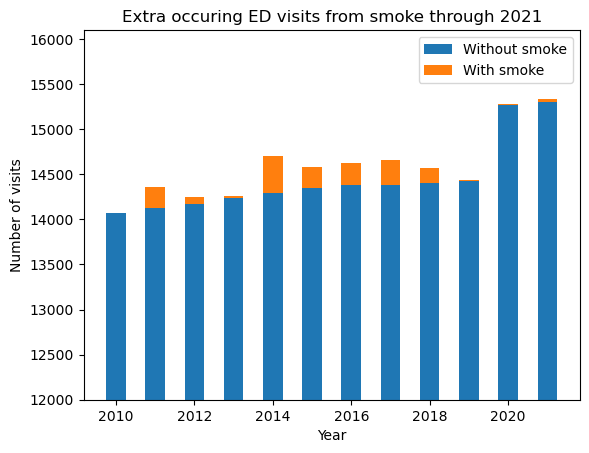

In [21]:
# Get information into format that is digestible by matplotlib
years = []
EDvisits1 = []
EDvisits2 = []
for year in ED_visits_no_smoke.keys():
    years.append(year)
    EDvisits1.append(ED_visits_no_smoke[year]["total"])
    EDvisits2.append(ED_visits_with_smoke[year]["Diff_total"])
    if(year == 2021): break
    
weight_counts = {
    "Without smoke": np.array(EDvisits1),
    "With smoke": np.array(EDvisits2)
}
width = 0.5

# Create plot
fig, ax = plt.subplots()
bottom = np.zeros(len(years))
for boolean, weight_count in weight_counts.items():
    p = ax.bar(years, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax.set_title("Extra occuring ED visits from smoke through 2021")
ax.set_xlabel("Year")
ax.set_ylabel("Number of visits")
ax.legend(loc="upper right")
ax.ticklabel_format(style='plain', useOffset=False, axis='y')
ax.set_ylim(12000)
plt.show()

# -------------------------------------------------------------------------------------------
# Show projected costs of ED visits vs projected healthcare enrollment
Assumption:  
https://hcup-us.ahrq.gov/reports/statbriefs/sb268-ED-Costs-2017.jsp - Each ED visits costs 530 USD regardless of the reason for the visit.  

This portion of work will be concerned with the third reason the policy recommendation was made:
```
Long term exposure to wildfire smoke exacerbates health issues. Thus, the increasing smoke will lead to increased
Emergency Department (ED) visits, which in turn costs extra money.
```

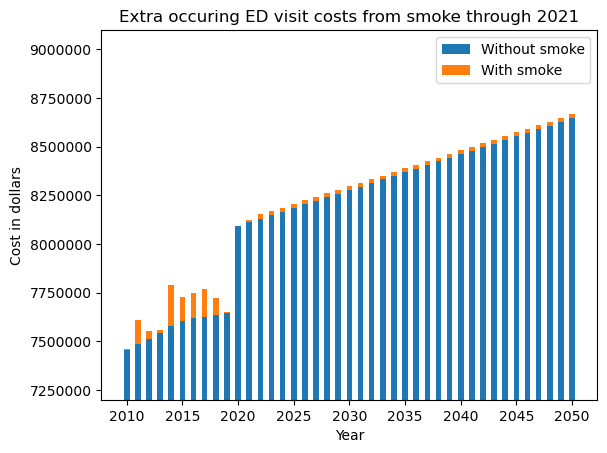

In [22]:
# Get information into format that is digestible by matplotlib
years = []
costs1 = []
costs2 = []
for year in ED_visits_no_smoke.keys():
    years.append(int(year))
    costs1.append((ED_visits_no_smoke[year]["total"]) * 530)
    costs2.append((ED_visits_with_smoke[year]["Diff_total"]) * 530)

weight_counts = {
    "Without smoke": np.array(costs1),
    "With smoke": np.array(costs2)
}
width = 0.5

# Create plot
fig, ax = plt.subplots()
bottom = np.zeros(len(years))
for boolean, weight_count in weight_counts.items():
    p = ax.bar(years, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax.set_title("Extra occuring ED visit costs from smoke through 2021")
ax.set_xlabel("Year")
ax.set_ylabel("Cost in dollars")
ax.legend(loc="upper right")
ax.ticklabel_format(style='plain', useOffset=False, axis='y')
ax.set_ylim(7200000)
plt.show()

# -------------------------------------------------------------------------------------------
# Analyze health care workers per projected ED visit

Work relevancy:
```
Relevant to policy recommendation reason #1: 
    The Health care industry is going to have their work cut out for them in the future due to an increasing population,
    increasing old age depedency ratio, and decreasing number of healthcare workers.
```
# -------------------------------------------------------------------------------------------
In this work we want to show a ratio between the number of healthcare workers and the population.

However, since population was projected to 2050 we will also have to project healthcare employment counts.  
We will do this via another ARIMA model, using default parameters this time (arbitrary decision). 

ARIMA details:
```
What is ARIMA?
According to https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp,
"An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. 

A statistical model is autoregressive if it predicts future values based on past values. For example, an ARIMA model might seek to predict a stock's future prices based on its past performance or forecast a company's earnings based on past periods."

The parameters of ARIMA can be defined as:
"p: the number of lag observations in the model, also known as the lag order.
d: the number of times the raw observations are differenced; also known as the degree of differencing.
q: the size of the moving average window, also known as the order of the moving average."
```
In our specific case, default parameters are:  
p = 0   
d = 0    
q = 0    

Text(0, 0.5, 'Ratio')

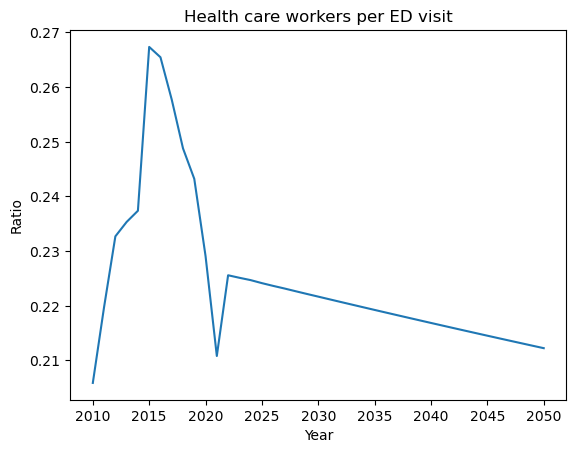

In [23]:
# Get healthcare worker data into format digestible by the ARIMA model class
healthcareworkercounts = []
healthcareworkerInfo = {}
for year in total_hes_workers_estimates.keys():
    healthcareworkercounts.append(float(total_hes_workers_estimates[year]))
    healthcareworkerInfo[int(year)] = float(total_hes_workers_estimates[year])

# Fit ARIMA model and make predictions on healthcare worker count to 2050
model = statsmodels.tsa.arima.model.ARIMA(healthcareworkercounts).fit()
predictions = model.predict(start=60, end=88)
year = 2022
for pred in predictions:
    #print("Year:", year, "Predicted:", pred)
    #smoke_real_and_projected[year] = pred
    healthcareworkerInfo[year] = pred
    year += 1

# Get data into format digestible by matplotlib
years = []
ratios = []
for year in healthcareworkerInfo.keys():
    years.append(year)
    ratios.append(healthcareworkerInfo[int(year)] / (ED_visits_no_smoke[int(year)]["total"] + ED_visits_with_smoke[int(year)]["Diff_total"]))

# Create plot
plt.plot(years, ratios)
plt.title("Health care workers per ED visit")
plt.xlabel("Year")
plt.ylabel("Ratio")